In [1]:
# Instalamos las librerías necesarias
!pip install -q nltk unidecode scikit-learn wordcloud matplotlib spacy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importamos herramientas
import nltk
import re
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from spacy.lang.en import stop_words
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from unidecode import unidecode

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

In [4]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.9 MB 9.6 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.9 MB 14.2 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.9 MB 16.2 MB/s eta 0:00:01
     --------------------------------------  12.8/12.9 MB 17.3 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 14.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from nltk.corpus import stopwords

# 🧠 Introducción al NLP (Procesamiento de Lenguaje Natural)

## ¿Qué es el NLP?

El **Procesamiento de Lenguaje Natural** (o *Natural Language Processing*, NLP por sus siglas en inglés) es una rama de la inteligencia artificial que le permite a las computadoras **entender, interpretar y generar lenguaje humano**.

En otras palabras, el NLP busca que las máquinas puedan trabajar con textos y palabras de manera similar a cómo lo hacemos las personas.

---

## 🌎 ¿Dónde vemos NLP en la vida real?

El NLP está en todas partes, aunque no siempre nos demos cuenta. Algunos ejemplos que usamos todos los días:

- 🔍 **Buscadores como Google**: cuando escribes una pregunta, el sistema "entiende" lo que buscas.
- 🗣️ **Asistentes virtuales** como Alexa, Siri o Google Assistant.
- 💬 **Traducción automática** en Google Translate.
- 📧 **Detección de spam** en los correos electrónicos.
- 📝 **Corrección ortográfica y autocompletado** en tu celular o computadora.
- 💡 **Chatbots de atención al cliente**.

---

## 🧩 ¿Qué tareas básicas realiza el NLP?

1. **Tokenización**: dividir un texto en palabras o frases.
2. **Eliminación de palabras vacías** (*stopwords*): quitar palabras comunes que no aportan mucho (como “el”, “la”, “de”).
3. **Lematización y stemming**: reducir las palabras a su forma base. Ejemplo: "corriendo" → "correr".
4. **Análisis de sentimientos**: detectar si un texto es positivo, negativo o neutro.
5. **Clasificación de texto**: por ejemplo, categorizar una reseña como buena o mala.

---

## 🧪 ¿Por qué es importante?

Porque el 80% de la información del mundo está en forma de texto (mensajes, correos, redes sociales, artículos, etc). El NLP nos permite **convertir ese texto en datos útiles** para análisis, predicción y automatización.

# 🧹 Limpieza de texto: preparando el lenguaje para ser entendido por la máquina

Cuando trabajamos con texto, lo primero que hay que hacer es **limpiarlo**, ya que el lenguaje humano viene con muchos "ruidos": símbolos raros, errores, tildes, palabras innecesarias, etc.

Imagina que el texto es como fruta antes de hacer un jugo 🍊: hay que pelarla, quitarle semillas y dejar solo lo útil.

---

## 🧼 ¿Qué tipo de limpieza hacemos normalmente?

Aquí algunas tareas comunes que se hacen **antes de analizar texto**:

1. **Quitar caracteres especiales**: como `! @ # % $`, que no aportan mucho significado.
2. **Eliminar acentos**: para que "acción" y "accion" sean tratadas igual.
3. **Pasar todo a minúsculas**: así "Python" y "python" no se ven como cosas distintas.
4. **Eliminar espacios en blanco extra**: como los espacios dobles o al inicio/final del texto.
5. **Quitar *stopwords***: palabras muy comunes como "el", "la", "de", que no ayudan a entender el mensaje principal.

---

## 🎯 ¿Por qué hacemos esto?

- Para reducir el número de palabras distintas que la computadora debe procesar.
- Para hacer que el texto sea más fácil de analizar.
- Para enfocarnos en las palabras que **realmente aportan significado**.

¡Veamos cómo hacerlo con Python! 👇


In [6]:
# Texto original
texto = "  ¡Hola! ¿Cómo estás? Me ENCANTA aprender Ciencia de Datos con Python.  "

# 1. Pasar a minúsculas
texto = texto.lower()

# 2. Eliminar acentos
texto = unidecode(texto)

# 3. Quitar caracteres especiales y signos de puntuación
texto = re.sub(r'[^a-zA-Z\s]', '', texto)

# 4. Eliminar espacios extras
texto = texto.strip()

# 5. Tokenizar (separar en palabras)
palabras = word_tokenize(texto)

# 6. Eliminar stopwords
stopwords_es = set(stopwords.words('spanish'))
palabras_limpias = [p for p in palabras if p not in stopwords_es]

# Resultado
print("🔹 Texto limpio y listo para análisis:")
print(palabras_limpias)

🔹 Texto limpio y listo para análisis:
['hola', 'encanta', 'aprender', 'ciencia', 'datos', 'python']


# 🧺 Bag of Words (Bolsa de Palabras) y 🌥️ Word Cloud (Nube de Palabras)

## 🧺 ¿Qué es Bag of Words (BoW)?

Es una forma muy simple de convertir texto en números que la computadora pueda entender.

👉 Imagina que tienes varias frases. El **Bag of Words** crea una especie de "tabla" donde cada columna es una palabra, y cada fila cuenta cuántas veces aparece esa palabra en cada frase.

🎒 No le importa el orden de las palabras, ni la gramática, solo **cuántas veces aparece cada palabra**. Por eso se llama "bolsa": como si echáramos todas las palabras en una bolsa, sin importar el orden.

### 📦 Ejemplo:
Frases:
- "Me gusta el café"
- "El café es delicioso"

Bag of Words:

|       | café | me | gusta | el | es | delicioso |
|-------|------|----|-------|----|----|-----------|
| Frase 1 | 1    | 1  | 1     | 1  | 0  | 0         |
| Frase 2 | 1    | 0  | 0     | 1  | 1  | 1         |

---

## 🌥️ ¿Qué es una Word Cloud?

Es una representación **visual** de las palabras más frecuentes en un texto. Cuanto más grande se ve una palabra, **más veces aparece**.

Es una forma muy útil para **resumir visualmente** de qué trata un texto, una reseña, un conjunto de opiniones, etc.

---

## 🧠 ¿Para qué sirven?

- Para analizar grandes volúmenes de texto.
- Para encontrar las palabras más comunes rápidamente.
- Para convertir texto en datos que podemos usar en modelos de Machine Learning.

¡Vamos a crear uno juntos! 👇


In [7]:
# Frases de ejemplo
frases = [
    "Me gusta el café por las mañanas",
    "El café colombiano es delicioso",
    "No me gusta el té tanto como el café"
]

# Función básica de limpieza
def limpiar_texto(texto):
    texto = texto.lower()
    texto = unidecode(texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = texto.strip()
    return texto

# Limpiamos las frases
frases_limpias = [limpiar_texto(f) for f in frases]

In [8]:
# --- Bag of Words ---
vectorizador = CountVectorizer(stop_words=stopwords.words('spanish'))
X = vectorizador.fit_transform(frases_limpias)

# Mostramos la matriz como un DataFrame para entenderla mejor

df_bow = pd.DataFrame(X.toarray(), columns=vectorizador.get_feature_names_out())
print("🔹 Bag of Words:")
df_bow

🔹 Bag of Words:


,cafe,colombiano,delicioso,gusta,mananas
0,1,0,0,1,1
1,1,1,1,0,0
2,1,0,0,1,0


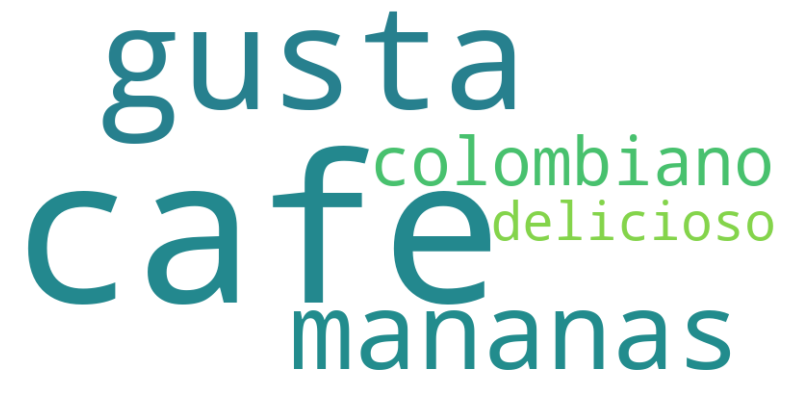

In [9]:
# --- Word Cloud ---
# Unimos todo el texto para crear la nube de palabras
todo_el_texto = " ".join(frases_limpias)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=set(stopwords.words('spanish'))
).generate(todo_el_texto)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 🌱 ¿Qué es el Stemming?

El **stemming** (o **raíz de palabras**) es una técnica que se usa en NLP para **reducir las palabras a su forma más básica o raíz**.

Por ejemplo:

- "caminar", "caminando", "camina", "caminará" → todas se reducen a → **"camin"**
- "jugar", "jugando", "jugó", "jugaremos" → **"jug"**

El objetivo del stemming es que el computador entienda que **todas esas palabras tienen un mismo significado básico**, aunque estén en diferentes tiempos verbales o formas.

---

## 🧠 ¿Por qué es útil?

Porque nos ayuda a:

- Reducir la cantidad de palabras únicas en un texto.
- Agrupar palabras parecidas que significan lo mismo.
- Mejorar modelos que analizan texto (como clasificación o análisis de sentimientos).

---

## 🧱 ¿Qué desventajas tiene?

El stemming **no siempre es perfecto**. A veces corta palabras demasiado y pierde sentido, ya que solo aplica reglas **mecánicas** sin entender el idioma.

Por eso existen otras técnicas más precisas como la **lematización**, pero el stemming sigue siendo útil en tareas rápidas o simples.

---

¡Veamos cómo funciona con Python! 👇


In [10]:
# Creamos el stemmer para español
stemmer = SnowballStemmer('spanish')

# Texto de ejemplo
texto = "Caminamos por el parque mientras caminábamos y luego caminaremos otra vez."

# Tokenizamos el texto
palabras = word_tokenize(texto.lower())

# Aplicamos stemming a cada palabra
palabras_stem = [stemmer.stem(p) for p in palabras if p.isalpha()]

# Mostramos los resultados
print("🔹 Palabras originales:")
print(palabras)

print("\n🔹 Palabras después del stemming:")
print(palabras_stem)


🔹 Palabras originales:
['caminamos', 'por', 'el', 'parque', 'mientras', 'caminábamos', 'y', 'luego', 'caminaremos', 'otra', 'vez', '.']

🔹 Palabras después del stemming:
['camin', 'por', 'el', 'parqu', 'mientr', 'camin', 'y', 'lueg', 'camin', 'otra', 'vez']


# 📚 ¿Qué es la Lematización?

La **lematización** es una técnica en NLP que convierte las palabras a su **forma base o diccionario**, conocida como **lema**.

Por ejemplo:

- "corriendo", "corrió", "correremos" → todas se convierten en **"correr"**
- "niños", "niñas", "niño", "niña" → en **"niño"**

---

## 🤔 ¿En qué se diferencia del Stemming?

| Stemming              | Lematización              |
|-----------------------|---------------------------|
| Recorta la palabra mecánicamente | Usa reglas gramaticales reales |
| Rápido, pero menos preciso      | Más lento, pero más correcto    |
| "jugando" → "jug"               | "jugando" → "jugar"             |

La lematización **entiende el idioma** y respeta su gramática. Es ideal para tareas donde queremos conservar el sentido original del texto.

---

## 🧠 ¿Por qué es útil?

- Agrupa palabras que significan lo mismo.
- Es más precisa que el stemming.
- Mejora la calidad de los modelos de texto.

---

¡Veamos cómo funciona con spaCy en español! 👇

In [11]:
nlp = spacy.load("es_core_news_sm")

# Texto de ejemplo
texto = "Los niños estaban corriendo y saltando en el parque mientras jugaban felices."

# Eliminar stopwords
stopwords_es = set(stopwords.words('spanish'))
palabras_limpias = [p for p in texto.split() if p not in stopwords_es]
palabras_limpias = ' '.join(palabras_limpias)

# Procesamos el texto
doc = nlp(texto)

# Imprimimos cada palabra con su forma original y su lema
print("🔹 Palabra - Lema")
for token in doc:
    if token.is_alpha:  # Solo letras (sin signos de puntuación)
        print(f"{token.text} → {token.lemma_}")


🔹 Palabra - Lema
Los → el
niños → niño
estaban → estar
corriendo → correr
y → y
saltando → saltar
en → en
el → el
parque → parque
mientras → mientras
jugaban → jugar
felices → feliz


# 📊 Lematización y Conteo de Palabras en un DataFrame

En este ejemplo vamos a trabajar con datos en forma de tabla usando **Pandas** y procesarlos con **spaCy**.

Vamos a:

1. Crear un DataFrame con una columna de texto libre.
2. Aplicar **lematización en español** a cada texto.
3. Añadir una columna nueva con el **texto lematizado**.
4. Añadir una columna con el **número de palabras** después de la lematización.

---

✅ Esto es muy útil para:

- Limpiar respuestas abiertas de encuestas.
- Procesar comentarios o reseñas.
- Preparar datos para análisis de texto o visualizaciones.


In [12]:

# Cargamos el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# ✅ Creamos un DataFrame con texto abierto
data = {
    "comentario": [
        "Los estudiantes estaban estudiando fuertemente para los exámenes finales.",
        "Me encantó la película, fue emocionante y muy bien actuada.",
        "La comida en el restaurante estaba fría y tardó mucho en llegar.",
        "Nosotros caminamos por el parque y hablamos de la vida.",
        "Estoy leyendo un libro interesante sobre inteligencia artificial."
    ]
}

df = pd.DataFrame(data)
df

,comentario
0,Los estudiantes estaban estudiando fuertemente...
1,"Me encantó la película, fue emocionante y muy ..."
2,La comida en el restaurante estaba fría y tard...
3,Nosotros caminamos por el parque y hablamos de...
4,Estoy leyendo un libro interesante sobre intel...


In [13]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = unidecode(texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = texto.strip()
    return texto

df['clean_text'] = df['comentario'].apply(limpiar_texto)
df

,comentario,clean_text
0,Los estudiantes estaban estudiando fuertemente...,los estudiantes estaban estudiando fuertemente...
1,"Me encantó la película, fue emocionante y muy ...",me encanto la pelicula fue emocionante y muy b...
2,La comida en el restaurante estaba fría y tard...,la comida en el restaurante estaba fria y tard...
3,Nosotros caminamos por el parque y hablamos de...,nosotros caminamos por el parque y hablamos de...
4,Estoy leyendo un libro interesante sobre intel...,estoy leyendo un libro interesante sobre intel...


In [14]:
# Eliminar stopwords

def remove_stop_words(texto):
    
    stopwords_es = set(stopwords.words('spanish'))
    palabras_limpias = [p for p in texto.split() if p not in stopwords_es]
    palabras_limpias = ' '.join(palabras_limpias)
    return palabras_limpias

df['clean_text_sw'] = df['clean_text'].apply(remove_stop_words)
df

,comentario,clean_text,clean_text_sw
0,Los estudiantes estaban estudiando fuertemente...,los estudiantes estaban estudiando fuertemente...,estudiantes estudiando fuertemente examenes fi...
1,"Me encantó la película, fue emocionante y muy ...",me encanto la pelicula fue emocionante y muy b...,encanto pelicula emocionante bien actuada
2,La comida en el restaurante estaba fría y tard...,la comida en el restaurante estaba fria y tard...,comida restaurante fria tardo llegar
3,Nosotros caminamos por el parque y hablamos de...,nosotros caminamos por el parque y hablamos de...,caminamos parque hablamos vida
4,Estoy leyendo un libro interesante sobre intel...,estoy leyendo un libro interesante sobre intel...,leyendo libro interesante inteligencia artificial


In [15]:
def lematizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc if token.is_alpha]
    return " ".join(lemas)

# ✅ Aplicamos la función al DataFrame
df["comentario_lema"] = df["clean_text_sw"].apply(lematizar)
df["word_count"] = df["comentario_lema"].apply(lambda x: len(x.split()))
df

,comentario,clean_text,clean_text_sw,comentario_lema,word_count
0,Los estudiantes estaban estudiando fuertemente...,los estudiantes estaban estudiando fuertemente...,estudiantes estudiando fuertemente examenes fi...,estudiante estudiar fuertemente examen final,5
1,"Me encantó la película, fue emocionante y muy ...",me encanto la pelicula fue emocionante y muy b...,encanto pelicula emocionante bien actuada,encanto pelicular emocionante bien actuado,5
2,La comida en el restaurante estaba fría y tard...,la comida en el restaurante estaba fria y tard...,comida restaurante fria tardo llegar,comida restaurante frio tardo llegar,5
3,Nosotros caminamos por el parque y hablamos de...,nosotros caminamos por el parque y hablamos de...,caminamos parque hablamos vida,caminar parque hablar vida,4
4,Estoy leyendo un libro interesante sobre intel...,estoy leyendo un libro interesante sobre intel...,leyendo libro interesante inteligencia artificial,leer libro interesante inteligencia artificial,5


In [16]:
# --- Bag of Words ---
vectorizador = CountVectorizer(stop_words=stopwords.words('spanish'))
X = vectorizador.fit_transform(df["comentario_lema"])

# Mostramos la matriz como un DataFrame para entenderla mejor

df_bow = pd.DataFrame(X.toarray(), columns=vectorizador.get_feature_names_out())
print("🔹 Bag of Words:")
df_bow

🔹 Bag of Words:


,actuado,artificial,bien,caminar,comida,emocionante,encanto,estudiante,estudiar,examen,...,inteligencia,interesante,leer,libro,llegar,parque,pelicular,restaurante,tardo,vida
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0


# 🧠 ¿Qué es TF-IDF?

**TF-IDF** significa:  
**Term Frequency – Inverse Document Frequency**  
(Frecuencia de término - Frecuencia inversa de documento)

Es una técnica que nos permite saber **qué tan importante es una palabra dentro de un documento**, considerando todos los documentos en un conjunto.

---

## 📌 ¿Por qué lo usamos?

Cuando analizamos muchos textos (comentarios, correos, reseñas, etc.), queremos saber **qué palabras son realmente importantes**, y no solo las más repetidas.

Por ejemplo, palabras como “la”, “muy”, “bueno” aparecen en casi todos los textos, así que no nos dicen mucho.  
TF-IDF nos ayuda a **dar más peso a palabras únicas o significativas**, y menos peso a las palabras comunes.

---

## ⚙️ ¿Cómo funciona?

### Paso 1: **TF – Term Frequency**  
Mide cuántas veces aparece una palabra en un documento.

Ejemplo:  
Si el texto es: `"me gusta mucho la pizza"`  
Y la palabra `"pizza"` aparece **1 vez** en un texto de **5 palabras**,  
entonces:

$$
TF = \frac{1}{5} = 0.2
$$

---

### Paso 2: **IDF – Inverse Document Frequency**  
Mide en **cuántos documentos aparece esa palabra**.  
La idea es penalizar las palabras que aparecen en todos los textos (porque no aportan información única).

Se calcula así:

$$
IDF = \log\left(\frac{\text{número total de documentos}}{\text{número de documentos que contienen la palabra}}\right)
$$

Ejemplo:  
Si `"pizza"` aparece en **1 de 10 documentos**, su IDF será alto → ¡Es una palabra única!  
Si `"la"` aparece en **los 10 documentos**, su IDF será bajo → Es común y poco informativa.

---

### Paso 3: **TF-IDF final**

$$
TF\text{-}IDF = TF \times IDF
$$

Cuanto más frecuente sea una palabra en un documento (TF), y **menos frecuente sea en los demás documentos (IDF)**, más importante será.

---

## 🎯 ¿Qué obtenemos con esto?

TF-IDF transforma cada documento en un vector de números (uno por palabra).  
Esto permite que algoritmos como clasificadores o motores de búsqueda puedan trabajar con texto como si fueran **datos numéricos**.

---

## 🧰 ¿Dónde se usa TF-IDF?

- Clasificación de correos (spam vs no spam)
- Motores de búsqueda (como Google)
- Detección de temas en documentos
- Análisis de sentimientos
- Chatbots

---

Vamos a probar esto con un ejemplo práctico en Python 👇


In [17]:
# Simulamos un conjunto de textos
documentos = [
    "Me encantó la película, fue increíble.",
    "La película fue buena, pero el final fue aburrido.",
    "No me gustó la película, me dormí a la mitad.",
    "Una película excelente, la volvería a ver.",
    "La película fue regular, esperaba más acción."
]

# Creamos el DataFrame
df = pd.DataFrame({"texto": documentos})
display(df)
# Creamos el vectorizador TF-IDF (con stopwords en español)
vectorizador = TfidfVectorizer(stop_words=stopwords.words('spanish'))

# Ajustamos y transformamos los textos
tfidf_matrix = vectorizador.fit_transform(df["texto"])

# Convertimos la matriz a un DataFrame para visualizarla mejor
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizador.get_feature_names_out())

# Mostramos los resultados
print("📊 TF-IDF por documento:")
tfidf_df.round(2)

,texto
0,"Me encantó la película, fue increíble."
1,"La película fue buena, pero el final fue aburr..."
2,"No me gustó la película, me dormí a la mitad."
3,"Una película excelente, la volvería a ver."
4,"La película fue regular, esperaba más acción."


📊 TF-IDF por documento:


,aburrido,acción,buena,dormí,encantó,esperaba,excelente,final,gustó,increíble,mitad,película,regular,ver,volvería
0,0.00,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.67,0.00,0.32,0.00,0.00,0.00
1,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.27,0.00,0.00,0.00
2,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.00,0.56,0.27,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.27,0.00,0.56,0.56
4,0.00,0.56,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.27,0.56,0.00,0.00


# 🧪 Ejercicio completo: Análisis de sentimientos con TF-IDF y modelo de clasificación

En este ejercicio, vamos a:

1. Simular un conjunto de reseñas con etiquetas de sentimiento (positivo o negativo).
2. Limpiar el texto: quitar caracteres especiales, acentos, convertir a minúsculas, etc.
3. Lematizar el texto en español usando `spaCy`.
4. Convertir el texto en vectores numéricos usando **TF-IDF**.
5. Entrenar un modelo de clasificación.
6. Usar **GridSearchCV** para encontrar los mejores parámetros del modelo.

---

## 📚 ¿Qué aprenderás con esto?

- Cómo preparar texto real para modelar.
- Cómo transformar texto en números con TF-IDF.
- Cómo aplicar clasificación con `scikit-learn`.
- Cómo evaluar distintos parámetros con `GridSearchCV`.

¡Vamos paso a paso!


In [18]:
datos = {
    "reseña": [
        "Me encantó este producto, lo volvería a comprar.",
        "Horrible, llegó dañado y nadie respondió a mi reclamo.",
        "Excelente calidad y servicio rápido. Muy recomendado.",
        "No me gustó, se rompió al segundo uso.",
        "Muy bueno, justo lo que necesitaba.",
        "Pésimo, se demoró muchísimo en llegar y venía sucio.",
        "Estoy feliz con la compra, funciona perfecto.",
        "Una pérdida de dinero, no sirve para nada.",
        "Muy satisfecho con el producto, buena relación calidad/precio.",
        "Terrible experiencia, nunca llegó y no me reembolsaron."
    ],
    "sentimiento": [
        "positivo", "negativo", "positivo", "negativo", "positivo",
        "negativo", "positivo", "negativo", "positivo", "negativo"
    ]
}

df = pd.DataFrame(datos)
df

,reseña,sentimiento
0,"Me encantó este producto, lo volvería a comprar.",positivo
1,"Horrible, llegó dañado y nadie respondió a mi ...",negativo
2,Excelente calidad y servicio rápido. Muy recom...,positivo
3,"No me gustó, se rompió al segundo uso.",negativo
4,"Muy bueno, justo lo que necesitaba.",positivo
5,"Pésimo, se demoró muchísimo en llegar y venía ...",negativo
6,"Estoy feliz con la compra, funciona perfecto.",positivo
7,"Una pérdida de dinero, no sirve para nada.",negativo
8,"Muy satisfecho con el producto, buena relación...",positivo
9,"Terrible experiencia, nunca llegó y no me reem...",negativo


# Solución

In [19]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^\w\s]", "", texto)  # Quita puntuación
    texto = re.sub(r"\d+", "", texto)      # Quita números
    texto = texto.strip()
    return texto

df["texto_limpio"] = df["reseña"].apply(limpiar_texto)
df

,reseña,sentimiento,texto_limpio
0,"Me encantó este producto, lo volvería a comprar.",positivo,me encantó este producto lo volvería a comprar
1,"Horrible, llegó dañado y nadie respondió a mi ...",negativo,horrible llegó dañado y nadie respondió a mi r...
2,Excelente calidad y servicio rápido. Muy recom...,positivo,excelente calidad y servicio rápido muy recome...
3,"No me gustó, se rompió al segundo uso.",negativo,no me gustó se rompió al segundo uso
4,"Muy bueno, justo lo que necesitaba.",positivo,muy bueno justo lo que necesitaba
5,"Pésimo, se demoró muchísimo en llegar y venía ...",negativo,pésimo se demoró muchísimo en llegar y venía s...
6,"Estoy feliz con la compra, funciona perfecto.",positivo,estoy feliz con la compra funciona perfecto
7,"Una pérdida de dinero, no sirve para nada.",negativo,una pérdida de dinero no sirve para nada
8,"Muy satisfecho con el producto, buena relación...",positivo,muy satisfecho con el producto buena relación ...
9,"Terrible experiencia, nunca llegó y no me reem...",negativo,terrible experiencia nunca llegó y no me reemb...


In [20]:
# --- 3. Lematización con spaCy ---
def lematizar(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(lemas)

df["texto_lema"] = df["texto_limpio"].apply(lematizar)
df

,reseña,sentimiento,texto_limpio,texto_lema
0,"Me encantó este producto, lo volvería a comprar.",positivo,me encantó este producto lo volvería a comprar,encantar producto volver comprar
1,"Horrible, llegó dañado y nadie respondió a mi ...",negativo,horrible llegó dañado y nadie respondió a mi r...,horrible dañado responder reclamo
2,Excelente calidad y servicio rápido. Muy recom...,positivo,excelente calidad y servicio rápido muy recome...,excelente calidad servicio rápido recomendado
3,"No me gustó, se rompió al segundo uso.",negativo,no me gustó se rompió al segundo uso,gustar romper
4,"Muy bueno, justo lo que necesitaba.",positivo,muy bueno justo lo que necesitaba,justo necesitar
5,"Pésimo, se demoró muchísimo en llegar y venía ...",negativo,pésimo se demoró muchísimo en llegar y venía s...,pésimo demorar muchísimo llegar venir sucio
6,"Estoy feliz con la compra, funciona perfecto.",positivo,estoy feliz con la compra funciona perfecto,feliz compra funcionar perfecto
7,"Una pérdida de dinero, no sirve para nada.",negativo,una pérdida de dinero no sirve para nada,pérdida dinero servir
8,"Muy satisfecho con el producto, buena relación...",positivo,muy satisfecho con el producto buena relación ...,satisfecho producto relación calidadprecio
9,"Terrible experiencia, nunca llegó y no me reem...",negativo,terrible experiencia nunca llegó y no me reemb...,terrible experiencia reembolsar


In [21]:
# --- 4. Vectorización con TF-IDF ---
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(df["texto_lema"])
y = df["sentimiento"]

In [22]:
pd.DataFrame(X.toarray(), columns=vectorizador.get_feature_names_out())

,calidad,calidadprecio,compra,comprar,dañado,demorar,dinero,encantar,excelente,experiencia,...,responder,romper,rápido,satisfecho,servicio,servir,sucio,terrible,venir,volver
0,0.000000,0.000000,0.0,0.518291,0.0,0.000000,0.00000,0.518291,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.518291
1,0.000000,0.000000,0.0,0.000000,0.5,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
2,0.447214,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.447214,0.00000,...,0.0,0.000000,0.447214,0.000000,0.447214,0.00000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.707107,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.0,0.408248,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.408248,0.00000,0.408248,0.000000
6,0.000000,0.000000,0.5,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.57735,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.518291,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.518291,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.57735,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.57735,0.000000,0.000000


In [23]:
# --- 5. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# --- 6. Clasificador con GridSearchCV ---
modelo = LogisticRegression(max_iter=1000)
parametros = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}
grid = GridSearchCV(modelo, parametros, cv=3)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']})

In [25]:
# --- 7. Evaluación del modelo ---
print("📈 Mejor modelo encontrado:")
print(grid.best_params_)

y_pred = grid.predict(X_test)

print("\n🧾 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

📈 Mejor modelo encontrado:
{'C': 0.01, 'solver': 'lbfgs'}

🧾 Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         2
    positivo       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

